# Project 6
## EAE 127
## Manbir Kaberwal

In [118]:
### Imports ####
import numpy as np
import math
import pyxfoil
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from mpl_toolkits.mplot3d import Axes3D

# Introduction

In this project, the goal is to design an aircraft optimized for two distinct courses at the Reno Air Races. The first course demands a balance between low drag for high-speed straightaways and high lift for tight turns. Three airfoils, including NACA 0012, NACA 23012, and the laminar flow P-51D airfoil, are analyzed using XFOIL polar data. The study includes performance analysis, considering specific flight conditions and selecting the most suitable airfoil based on unique trends. The second course focuses on maximum climb rate and low drag during a dive, requiring a different set of analyses and comparisons to determine the optimal airfoil. The project also introduces the Simple Lattice Method setup for 2D and 3D analysis of the P-51D wing, laying the groundwork for future investigations.

# 1.1 Design Conditions

## Equations

$$Re = \frac{\rho V_{\inf} c}{\mu}$$
$$ C_{L} = \frac{W}{0.5 \Rho V_{\inf} S}$$
$$ C_{L} = \frac{2W}{0.5 \Rho V_{\inf} S}$$

## Code
This was straightforward in we just plug given values we labeled as variabled and the output the Reynolds number and the Coefficient of Lift for Cruise and 2g cases.


In [119]:


# Given values
W = 12000  # Loaded Weight in lbs
S = 235    # Wing Area in ft^2
c = 8.48   # Root Chord Length in ft
b = 45     # Wing Span in ft
V_cruise = 586.667  # Cruise Speed in ft/s
h = 22000  # Geometric Cruise Altitude in ft
mu = 3.25e-7  # Dynamic Viscosity in slug/ft·s

# Constants for standard atmosphere model
rho = 11.866e-4  # Sea level air density in slug/ft^3

g = 32.174         # Acceleration due to gravity in ft/s^2



# Step 2: Calculate Design Reynolds Number (Re)
Re = (rho * V_cruise * c) / mu

# Step 3: Calculate CL_cruise
CL_cruise = (W / (0.5 * rho * (V_cruise**2) * S))

# Step 4: Calculate CL_2g
CL_2g = (W*2) / (0.5 * rho * (V_cruise**2) * S)

# Print the results
print(f"Design Reynolds number (Re): {Re:.2f}")
print(f"3-D lift coefficient for equilibrium, level flight (CL_cruise): {CL_cruise:.4f}")
print(f"3-D lift coefficient for equilibrium 2g turn (CL_2g): {CL_2g:.4f}")


Design Reynolds number (Re): 18163874.61
3-D lift coefficient for equilibrium, level flight (CL_cruise): 0.2501
3-D lift coefficient for equilibrium 2g turn (CL_2g): 0.5001


# 1.2 Airfoil analysis 

## Code
This code visualizes airfoil data by plotting the coordinates of points on the airfoil surface. It uses the PyXfoil library to extract aerodynamic polar data from specific airfoil files. The airfoil filenames are provided in the 'filenames' list. The script then iterates through each filename, extracts x and z coordinates from the file, scales them, and plots the airfoil shape. The resulting plot includes multiple airfoils specified by the filenames.

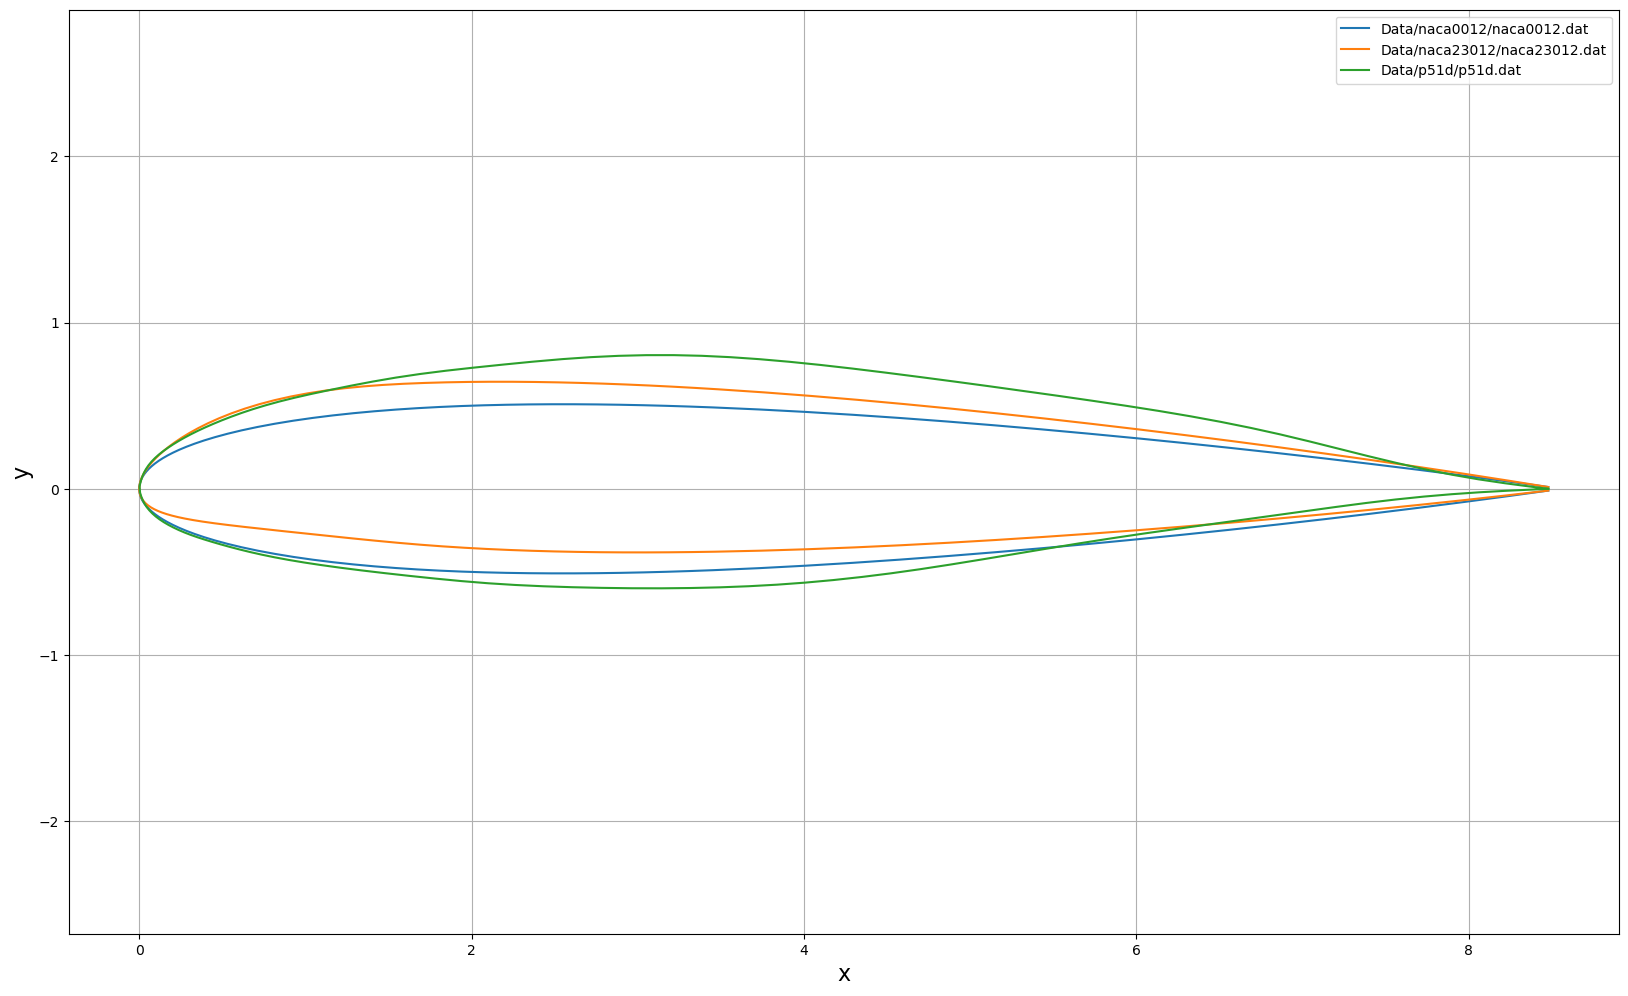

In [120]:
# Airfoil data
filenames = ['Data/naca0012/naca0012.dat', 'Data/naca23012/naca23012.dat', 'Data/p51d/p51d.dat']
naca = False
alf = 0

plt.figure(figsize=(20, 12))
plt.grid(True)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)

for filename in filenames:
    pyxfoil.GetPolar(filename, naca, alf, Re)
    x, z = np.loadtxt(filename, dtype=float, unpack=True, skiprows=1)
    plt.plot(x*8.48, z*8.48, label=filename)

plt.axis('equal')
plt.legend()
plt.show()

Below we are retriving polar data for each airfoil from the $\alpha$ range from -25.5 to +25

In [121]:
foil = '0012'
naca = True
alf = np.arange(-25.5, 25.5, 0.5)

pyxfoil.GetPolar(foil, naca, alf, Re, SaveCP=False, quiet=True, overwrite= True)

In [122]:
foil = '23012'
naca = True
alf = np.arange(-25.5, 25.5, 0.5)

pyxfoil.GetPolar(foil, naca, alf, Re, SaveCP=False, quiet=True, overwrite= True)

In [123]:
foil = 'Data/p51d/p51d.dat'
naca = False
alf = np.arange(-25.5, 25.5, 0.5)

pyxfoil.GetPolar(foil, naca, alf, Re, SaveCP=False, quiet=True, overwrite= True)

Below will be the lift coefficient versus $\alpha$ graph. We can see that the NACA airfoils exhibt similar graphs while the P51 does not.

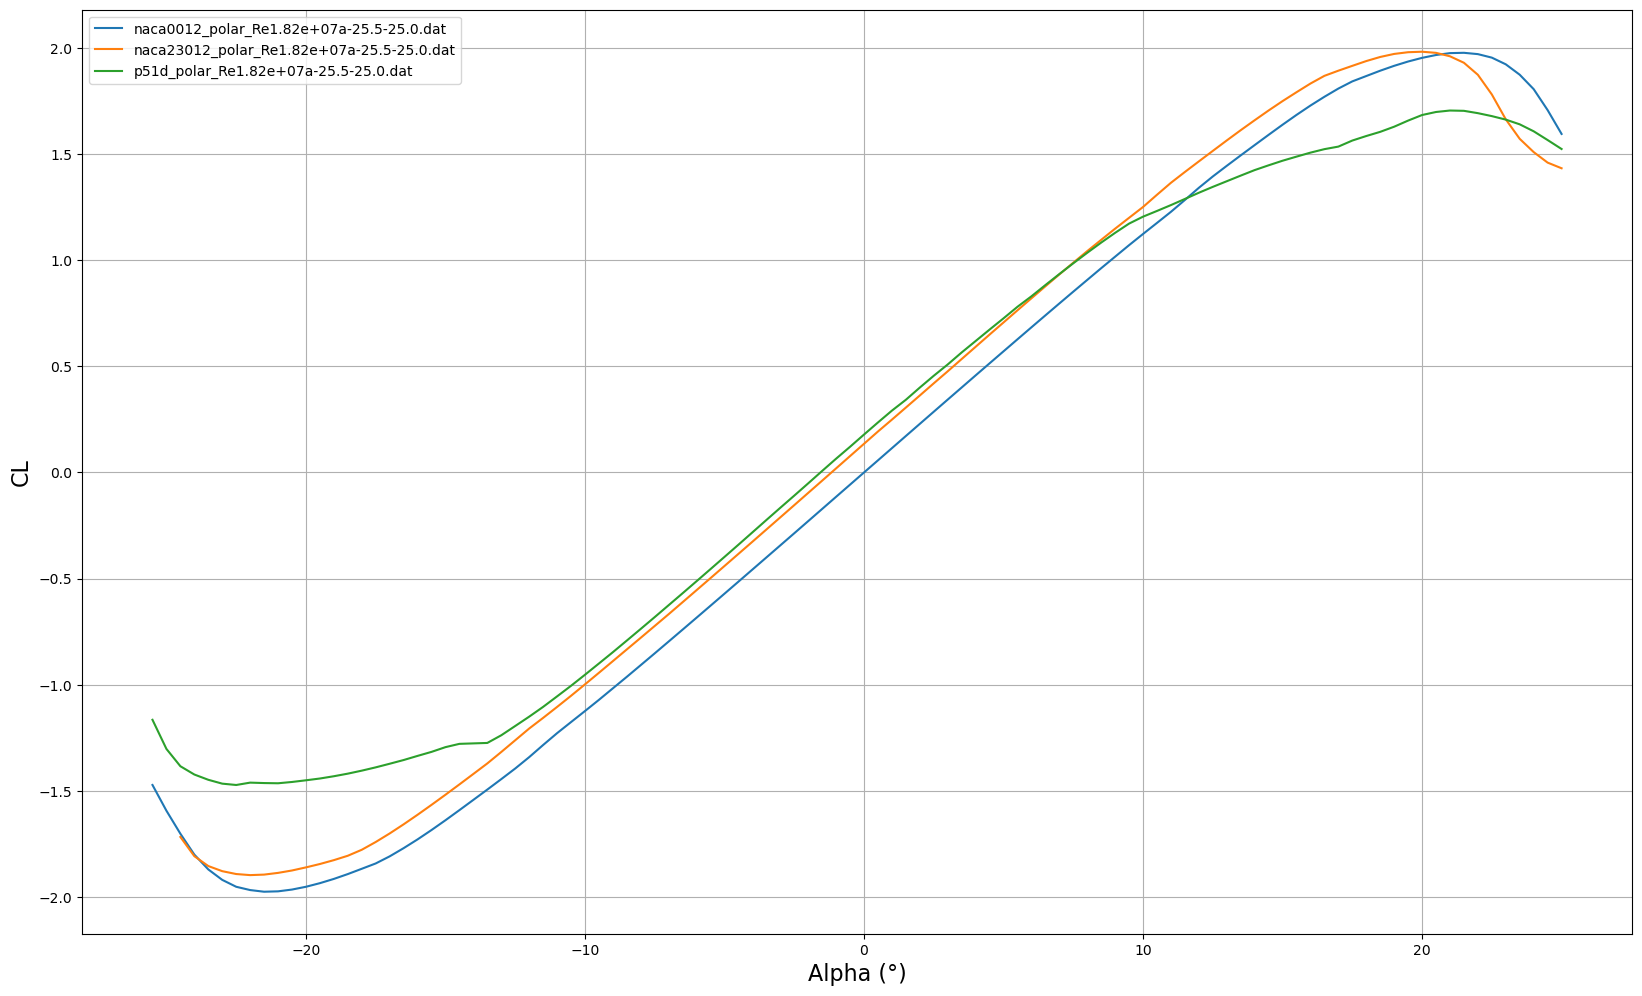

In [124]:
# List of filenames
filenames = [
    'Data/naca0012/naca0012_polar_Re1.82e+07a-25.5-25.0.dat',
    'Data/naca23012/naca23012_polar_Re1.82e+07a-25.5-25.0.dat',
    'Data/p51d/p51d_polar_Re1.82e+07a-25.5-25.0.dat'
]

# Initialize the plot
plt.figure(figsize=(20, 12))
plt.grid(True)
plt.xlabel('Alpha (°)', fontsize=16)
plt.ylabel('CL', fontsize=16)


# Loop through each file and plot the data
for filename in filenames:
    # Load data from file
    data = np.loadtxt(filename, dtype=float, unpack=True, skiprows=12)
    alpha, CL = data[0], data[1]  # Assuming alpha is in column 0 and CL in column 1

    # Plot the data
    plt.plot(alpha, CL, label=filename.split('/')[-1])  # Label with the file name

# Set up legend and show plot
plt.legend()
plt.show()


Below is the Drag Polar graph with the axis being limited by the range given from the project statement. The drag buckut is easyier to see NACA 5 digit and p51 having a larger drag bucket teh the NACA 4 digit.

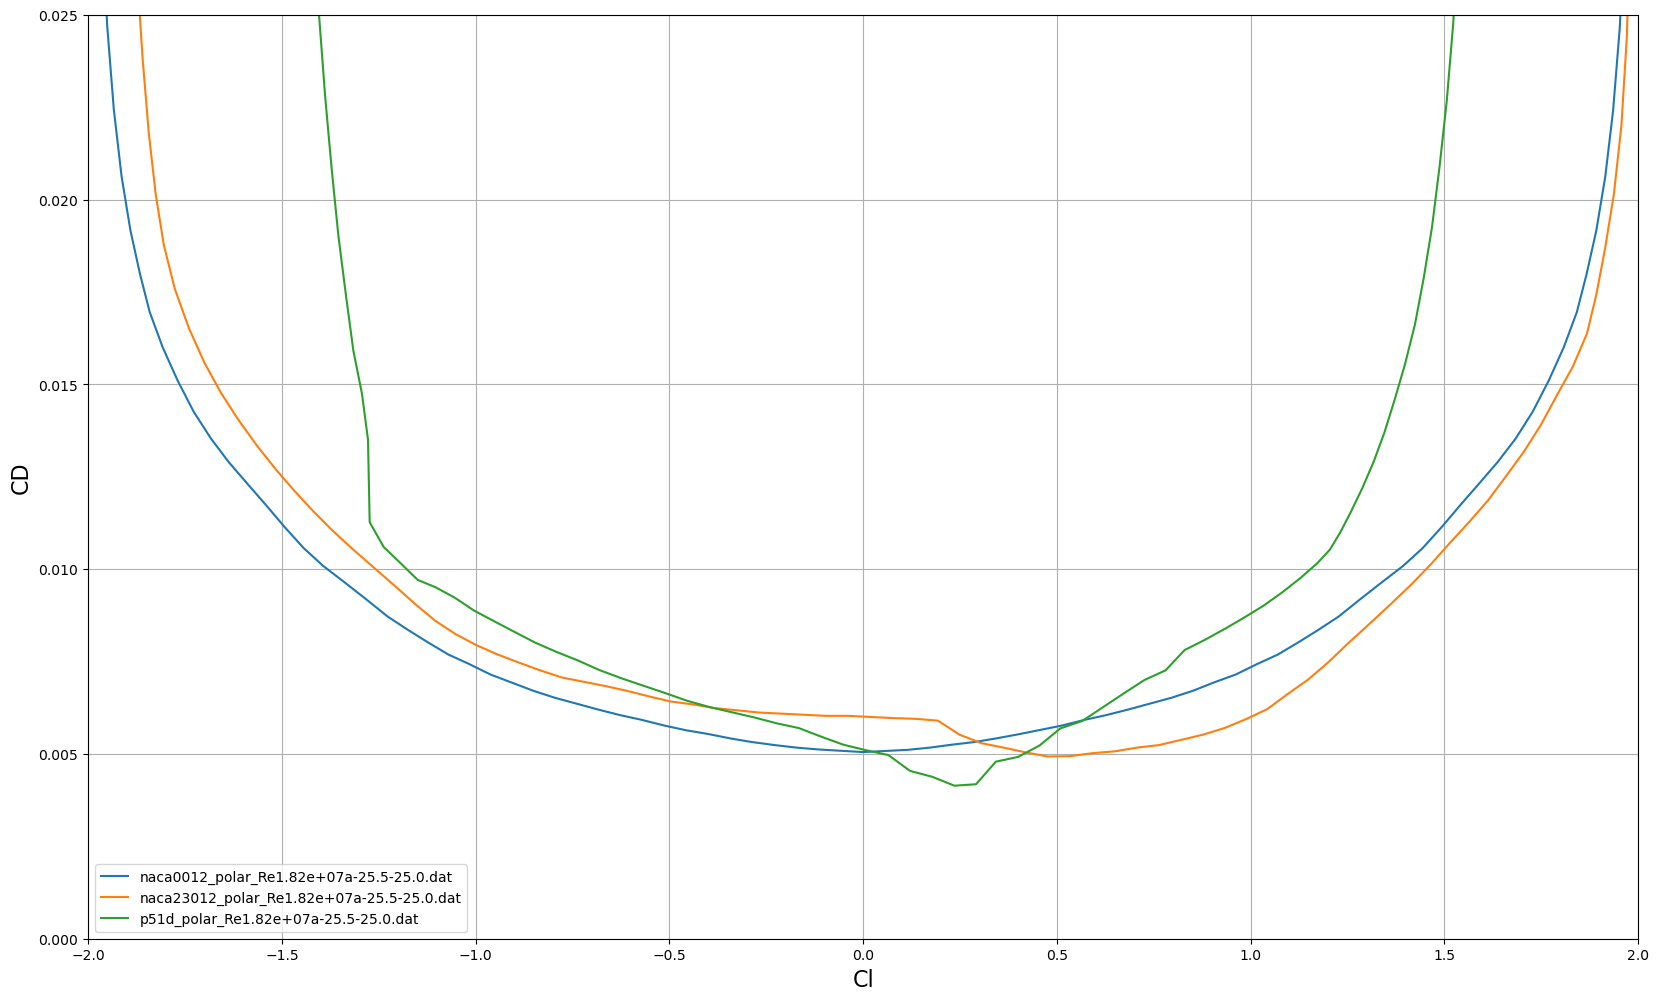

In [125]:
# Initialize the plot
plt.figure(figsize=(20, 12))
plt.grid(True)
plt.xlabel('Cl', fontsize=16)
plt.ylabel('CD', fontsize=16)
plt.xlim(-2,2)
plt.ylim(0, 0.025)

# Loop through each file and plot the data
for filename in filenames:
    # Load data from file
    data = np.loadtxt(filename, dtype=float, unpack=True, skiprows=12)
    CL, CD = data[1], data[2]  # Assuming alpha is in column 0 and CL in column 1

    # Plot the data
    plt.plot(CL, CD, label=filename.split('/')[-1])  # Label with the file name

# Set up legend and show plot
plt.legend()
plt.show()

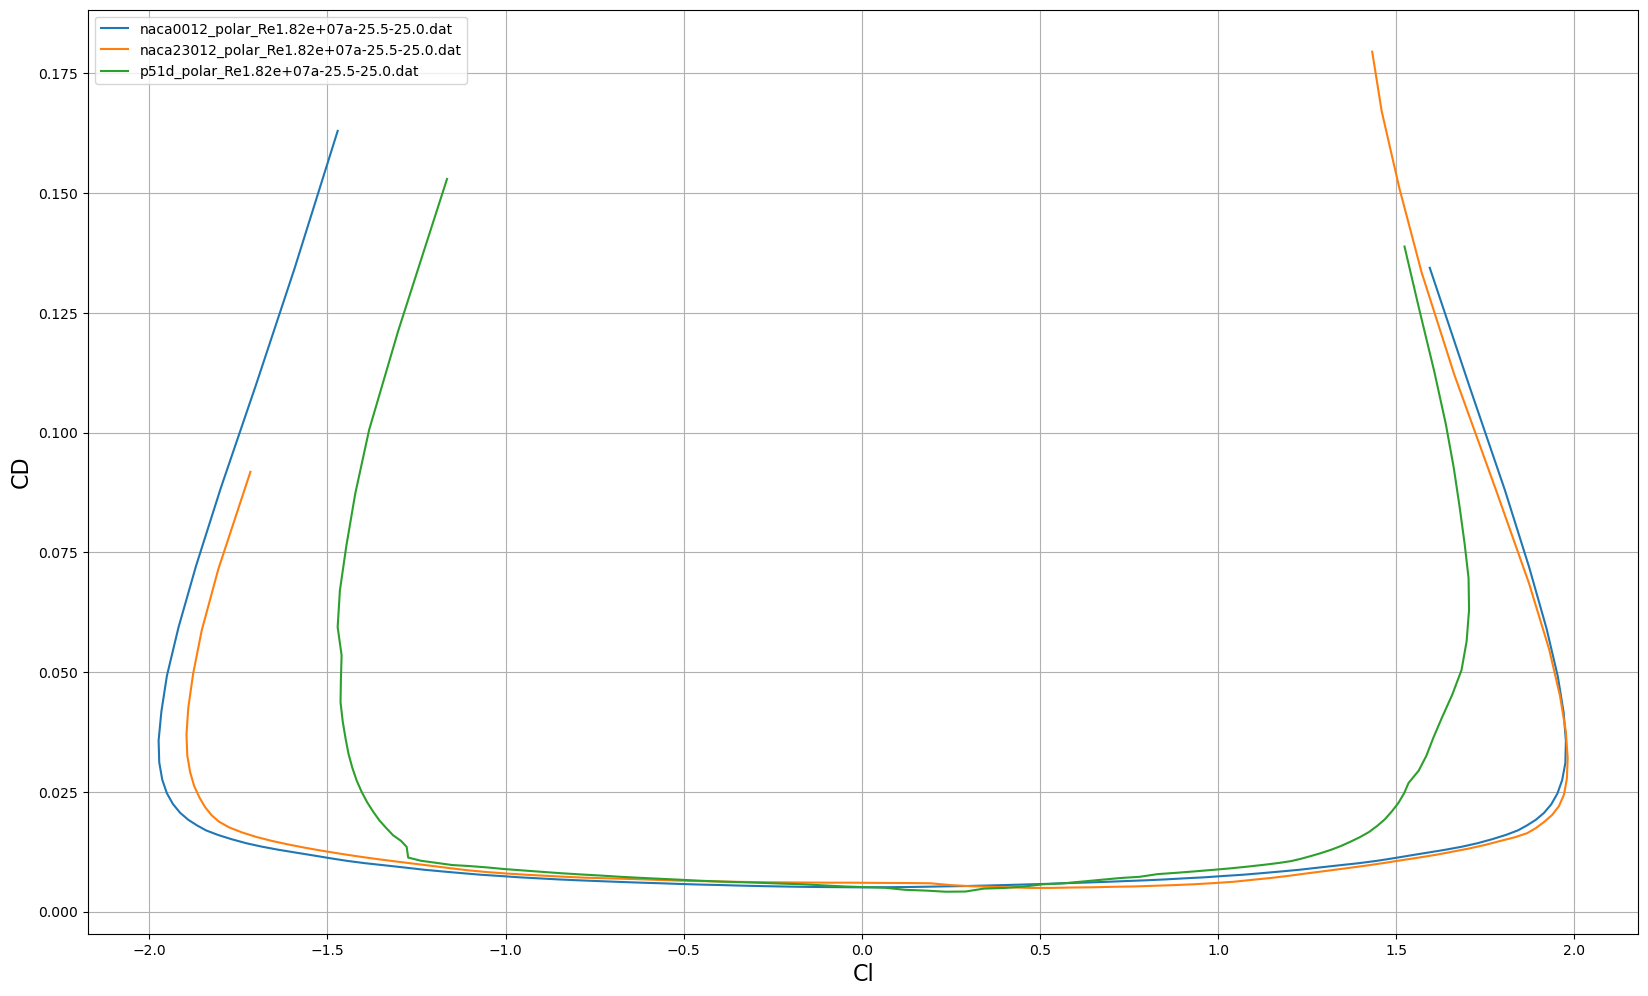

In [126]:
plt.figure(figsize=(20, 12))
plt.grid(True)
plt.xlabel('Cl', fontsize=16)
plt.ylabel('CD', fontsize=16)

# Loop through each file and plot the data
for filename in filenames:
    # Load data from file
    data = np.loadtxt(filename, dtype=float, unpack=True, skiprows=12)
    CL, CD = data[1], data[2]  # Assuming alpha is in column 0 and CL in column 1

    # Plot the data
    plt.plot(CL, CD, label=filename.split('/')[-1])  # Label with the file name

# Set up legend and show plot
plt.legend()
plt.show()

Above is the complete drage polar graph without limits so we can see how CD acts at high values.

And below is L/D ratio. I calculated D using the equation
$$ D = \frac{1}{2} \rho V_{\inf}^2 C_D S $$

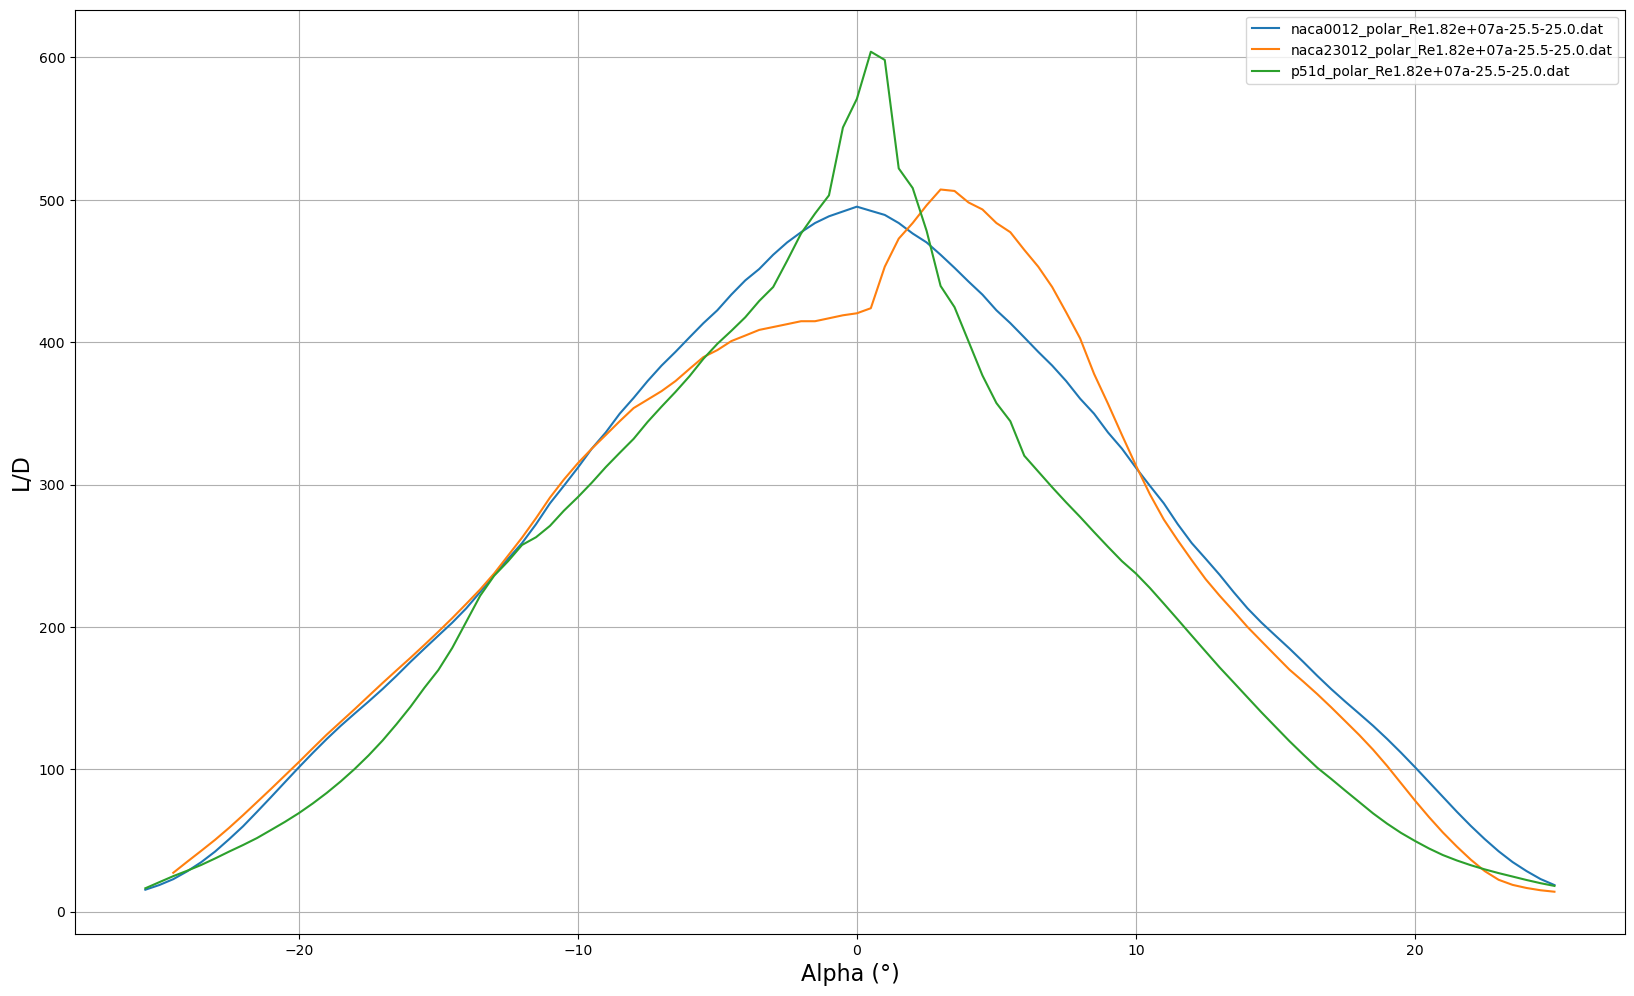

In [127]:
# Initialize the plot
plt.figure(figsize=(20, 12))
plt.grid(True)
plt.xlabel('Alpha (°)', fontsize=16)
plt.ylabel('L/D', fontsize=16)


# Loop through each file and plot the data
for filename in filenames:
    # Load data from file
    data = np.loadtxt(filename, dtype=float, unpack=True, skiprows=12)
    alpha, CL, CD = data[0], data[1], data[2] # Assuming alpha is in column 0 and CL in column 1
    D = (1/2) * rho * (V_cruise**2) * CD * S
    L = 120000
    L_D = L/D
    # Plot the data
    plt.plot(alpha, L_D, label=filename.split('/')[-1])  # Label with the file name

# Set up legend and show plot
plt.legend()
plt.show()

# 1.3 Performance Analysis

## Approach
The approach for this problem is to interpolate the values for $\alpha, C_L, D, \frac{L}{D}$

## Equations

We only used one equation no included the interpolation equation

$$ D = \frac{1}{2} \rho V_{\inf}^2 C_D S $$

## Code

This code performs aerodynamic analysis for three different airfoil configurations represented by the given filenames. It reads polar data (alpha, CL, CD, etc.) from each file, creates interpolation functions for alpha and CD with respect to CL, and then interpolates values for specific CL points. The code calculates drag (D) based on the interpolated CD, and for two given CL values, it computes and prints the alpha, CL, drag, and lift-to-drag ratio (L/D) for both level flight and a 2G turn condition. The results are printed for each airfoil configuration, providing insights into the aerodynamic performance under different flight conditions.


In [128]:
# File paths
filenames = [
    'Data/naca0012/naca0012_polar_Re1.82e+07a-25.5-25.0.dat',
    'Data/naca23012/naca23012_polar_Re1.82e+07a-25.5-25.0.dat',
    'Data/p51d/p51d_polar_Re1.82e+07a-25.5-25.0.dat'
]

# CL values for interpolation
given_CL_values = [0.2501, 0.5001]  # Example values, replace with your own

# Process each file
for filename in filenames:
    # Read data from the file
    alpha, CL, CD, CDp, CM, Top, Bot = np.loadtxt(filename, skiprows=12, unpack=True)

    # Create interpolation functions
    interp_alpha = interp1d(CL, alpha, kind='linear', bounds_error=False)
    interp_CD = interp1d(CL, CD, kind='linear', bounds_error=False)

    # File header
    print(f"{'File:':<15} {filename.split('/')[-1]}\n")
    print(f"{'Condition':<15} {'Alpha':<10} {'Cl':<10} {'D':<10} {'L/D':<10}")

   # Interpolate and print values for each CL value
    for given_CL in given_CL_values:
        alpha_interpolated, CD_interpolated = interp_alpha(given_CL), interp_CD(given_CL)
        D = (1/2) * rho * (V_cruise**2) * CD_interpolated * S

        if given_CL == 0.2501:  # Check if given_CL is 0.2501 for level flight
            L = 12000  # example value in Newtons for Lift Force
            L_D = L / D
        # Level Flight condition
            print(f"{'Level Flight':<15} {alpha_interpolated:<10.3f} {given_CL:<10.3f} {D:<10.3f} {L_D:<10.3f}")
        elif given_CL == 0.5001:  # Check if given_CL is 0.5001 for 2G condition
            # 2G Turn condition, Lift is doubled
            L_2g = 2 * L
            L_D_2g = L_2g / D
            print(f"{'2G Turn':<15} {alpha_interpolated:<10.3f} {given_CL:<10.3f} {D:<10.3f} {L_D_2g:<10.3f}")


    print("\n")  # Just for a line break between files


File:           naca0012_polar_Re1.82e+07a-25.5-25.0.dat

Condition       Alpha      Cl         D          L/D       
Level Flight    2.184      0.250      253.172    47.399    
2G Turn         4.378      0.500      275.477    87.122    


File:           naca23012_polar_Re1.82e+07a-25.5-25.0.dat

Condition       Alpha      Cl         D          L/D       
Level Flight    1.011      0.250      264.656    45.342    
2G Turn         3.204      0.500      236.773    101.363   


File:           p51d_polar_Re1.82e+07a-25.5-25.0.dat

Condition       Alpha      Cl         D          L/D       
Level Flight    0.630      0.250      199.167    60.251    
2G Turn         2.919      0.500      269.479    89.061    




## Results

We can see from the output that NACA 0012 has the greatest angle of attac during level flight. This is most likly do to the NACA 4 digit airfoil being symetric. I needs a higher angle of attack to achieve the same lift as the other airfoils.
P51D seems to be the best airfoil choice as it requires the least change in angle of attack to provide the same lift as the other options.

# 2 Course 2 Airfoil Selection Process

# 2.1 Course 2 Airfoil Analysis

## Code 
I took the graph code from prior and focused on key areas to show where stall and dive condtions show up form the results of the next section where we tabulate the actual values. I simply edited the X and Y Limits


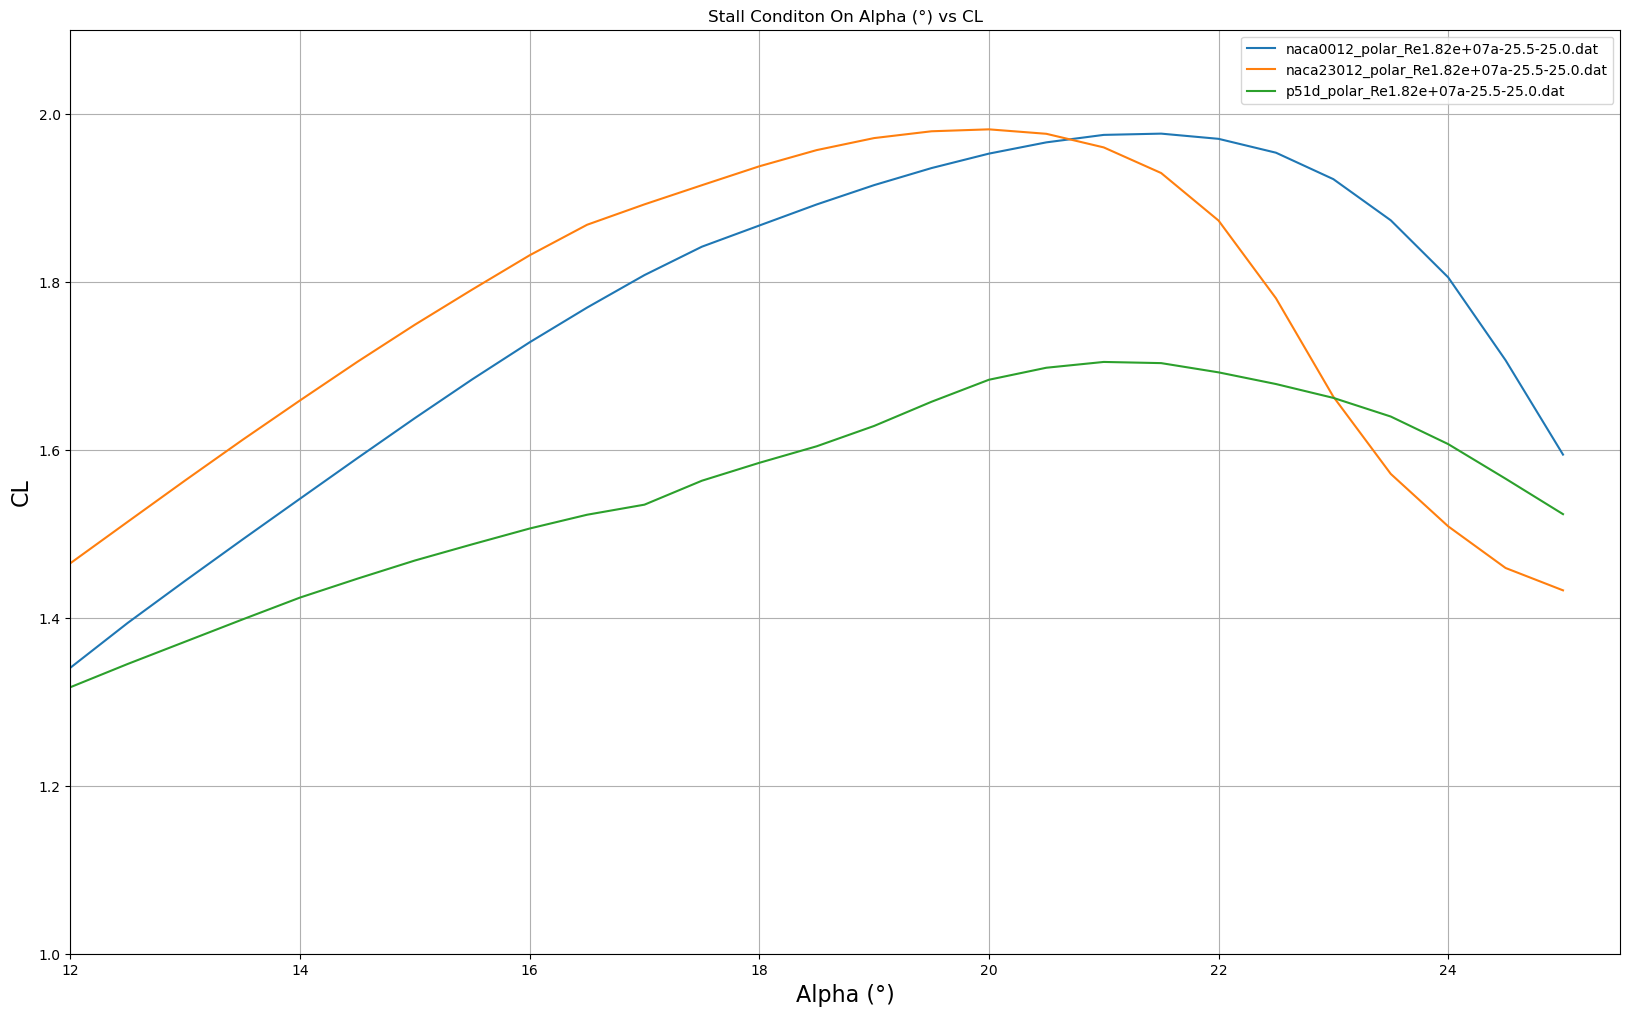

In [129]:
# List of filenames
filenames = [
    'Data/naca0012/naca0012_polar_Re1.82e+07a-25.5-25.0.dat',
    'Data/naca23012/naca23012_polar_Re1.82e+07a-25.5-25.0.dat',
    'Data/p51d/p51d_polar_Re1.82e+07a-25.5-25.0.dat'
]

# Initialize the plot
plt.figure(figsize=(20, 12))
plt.grid(True)
plt.xlabel('Alpha (°)', fontsize=16)
plt.ylabel('CL', fontsize=16)
plt.ylim(1,2.1)
plt.xlim(12,25.5)

# Loop through each file and plot the data
for filename in filenames:
    # Load data from file
    data = np.loadtxt(filename, dtype=float, unpack=True, skiprows=12)
    alpha, CL = data[0], data[1]  # Assuming alpha is in column 0 and CL in column 1

    # Plot the data
    plt.plot(alpha, CL, label=filename.split('/')[-1])  # Label with the file name

# Set up legend and show plot
plt.title('Stall Conditon On Alpha (°) vs CL')
plt.legend()
plt.show()

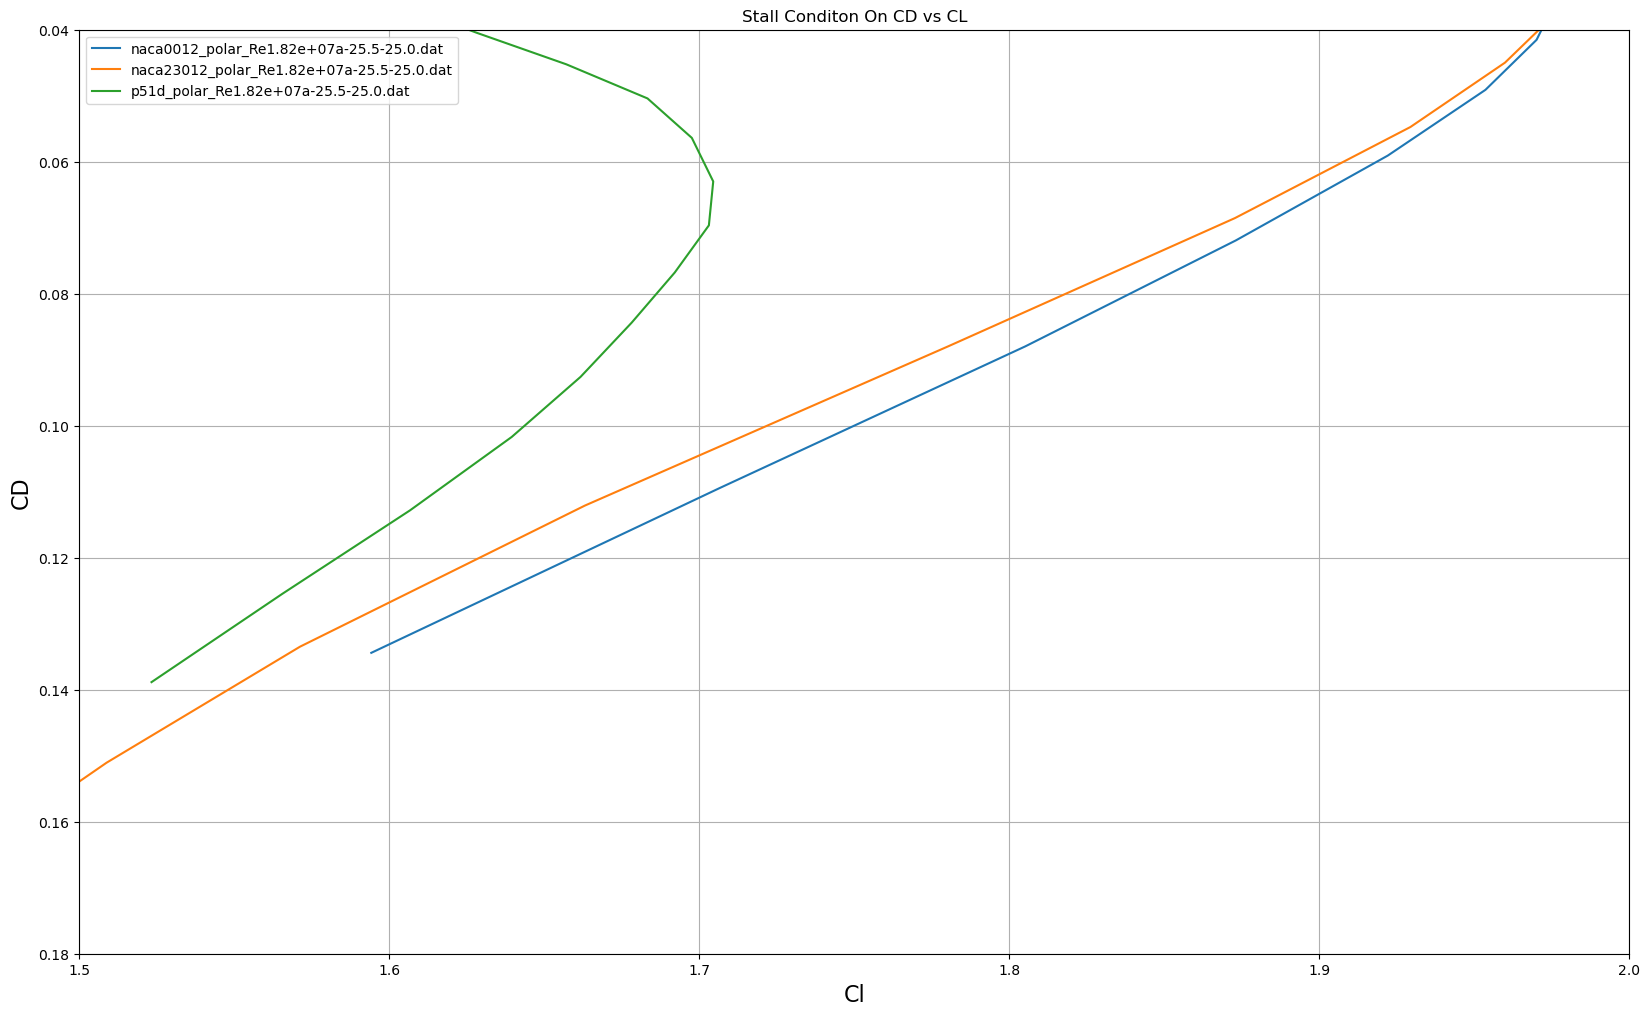

In [130]:
# Initialize the plot
plt.figure(figsize=(20, 12))
plt.grid(True)
plt.xlabel('Cl', fontsize=16)
plt.ylabel('CD', fontsize=16)
plt.ylim(0.18, 0.04)
plt.xlim(1.5,2)

# Loop through each file and plot the data
for filename in filenames:
    # Load data from file
    data = np.loadtxt(filename, dtype=float, unpack=True, skiprows=12)
    CL, CD = data[1], data[2]  # Assuming alpha is in column 0 and CL in column 1

    # Plot the data
    plt.plot(CL, CD, label=filename.split('/')[-1])  # Label with the file name

# Set up legend and show plot
plt.title('Stall Conditon On CD vs CL')
plt.legend()
plt.show()

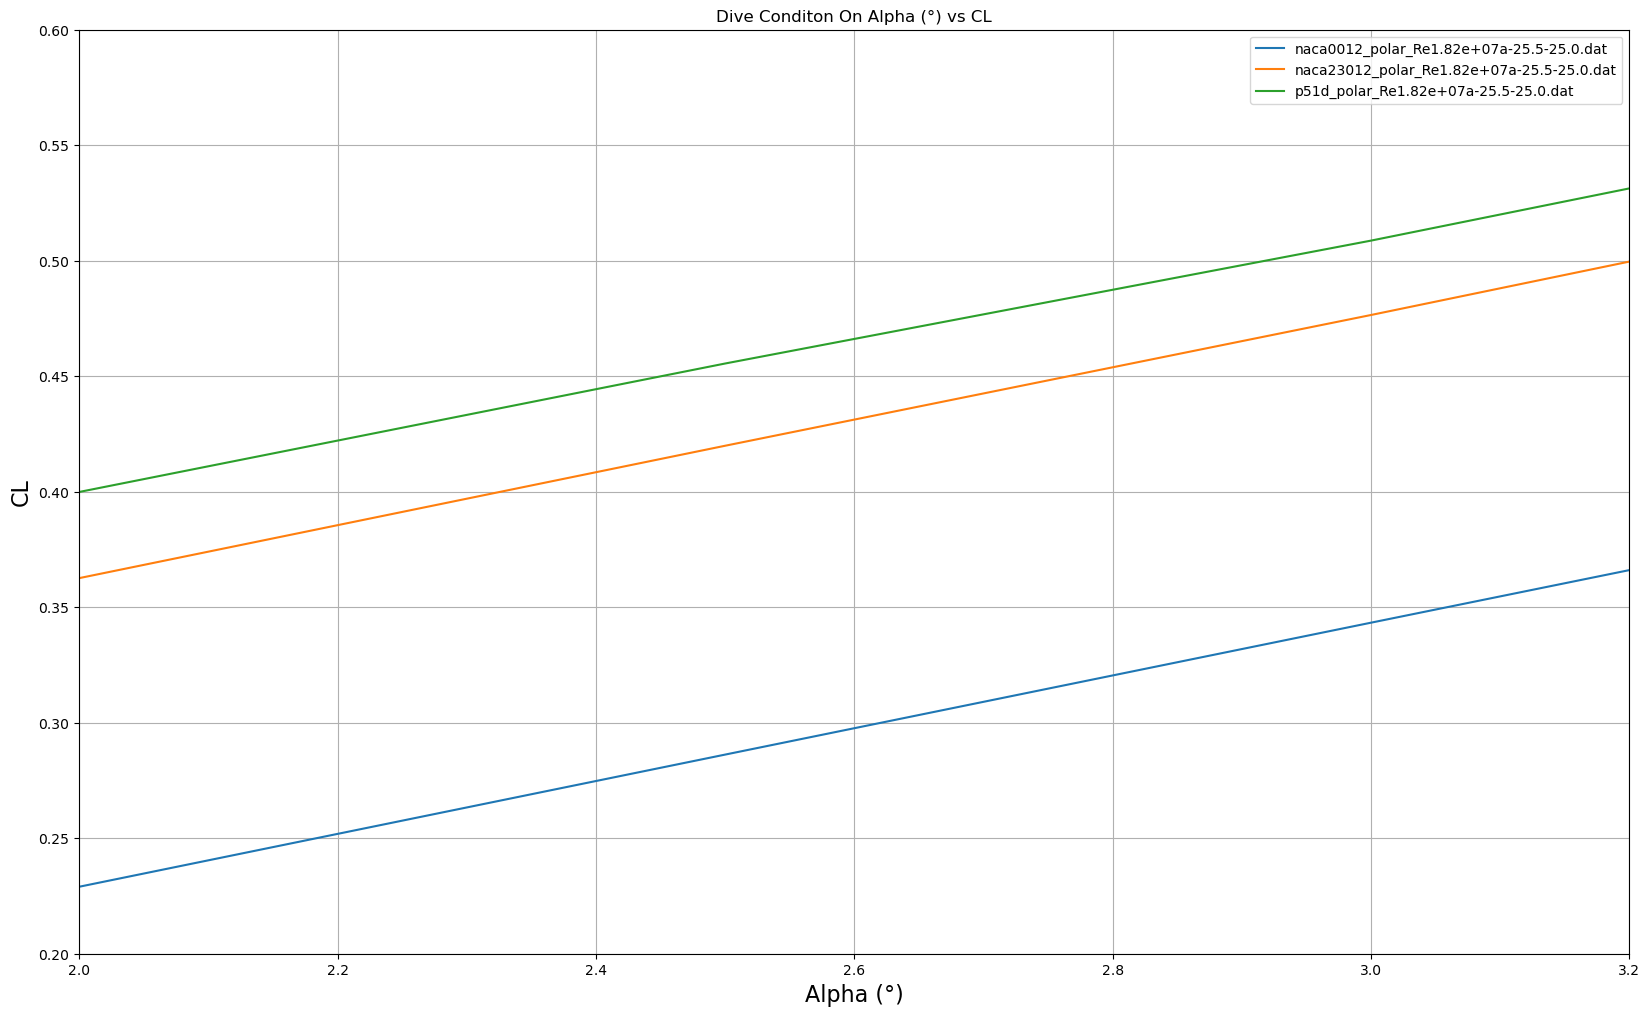

In [131]:
# Initialize the plot
plt.figure(figsize=(20, 12))
plt.grid(True)
plt.xlabel('Alpha (°)', fontsize=16)
plt.ylabel('CL', fontsize=16)
plt.ylim(0.2,.6)
plt.xlim(2,3.2)

# Loop through each file and plot the data
for filename in filenames:
    # Load data from file
    data = np.loadtxt(filename, dtype=float, unpack=True, skiprows=12)
    alpha, CL = data[0], data[1]  # Assuming alpha is in column 0 and CL in column 1

    # Plot the data
    plt.plot(alpha, CL, label=filename.split('/')[-1])  # Label with the file name

# Set up legend and show plot
plt.title('Dive Conditon On Alpha (°) vs CL')
plt.legend()
plt.show()

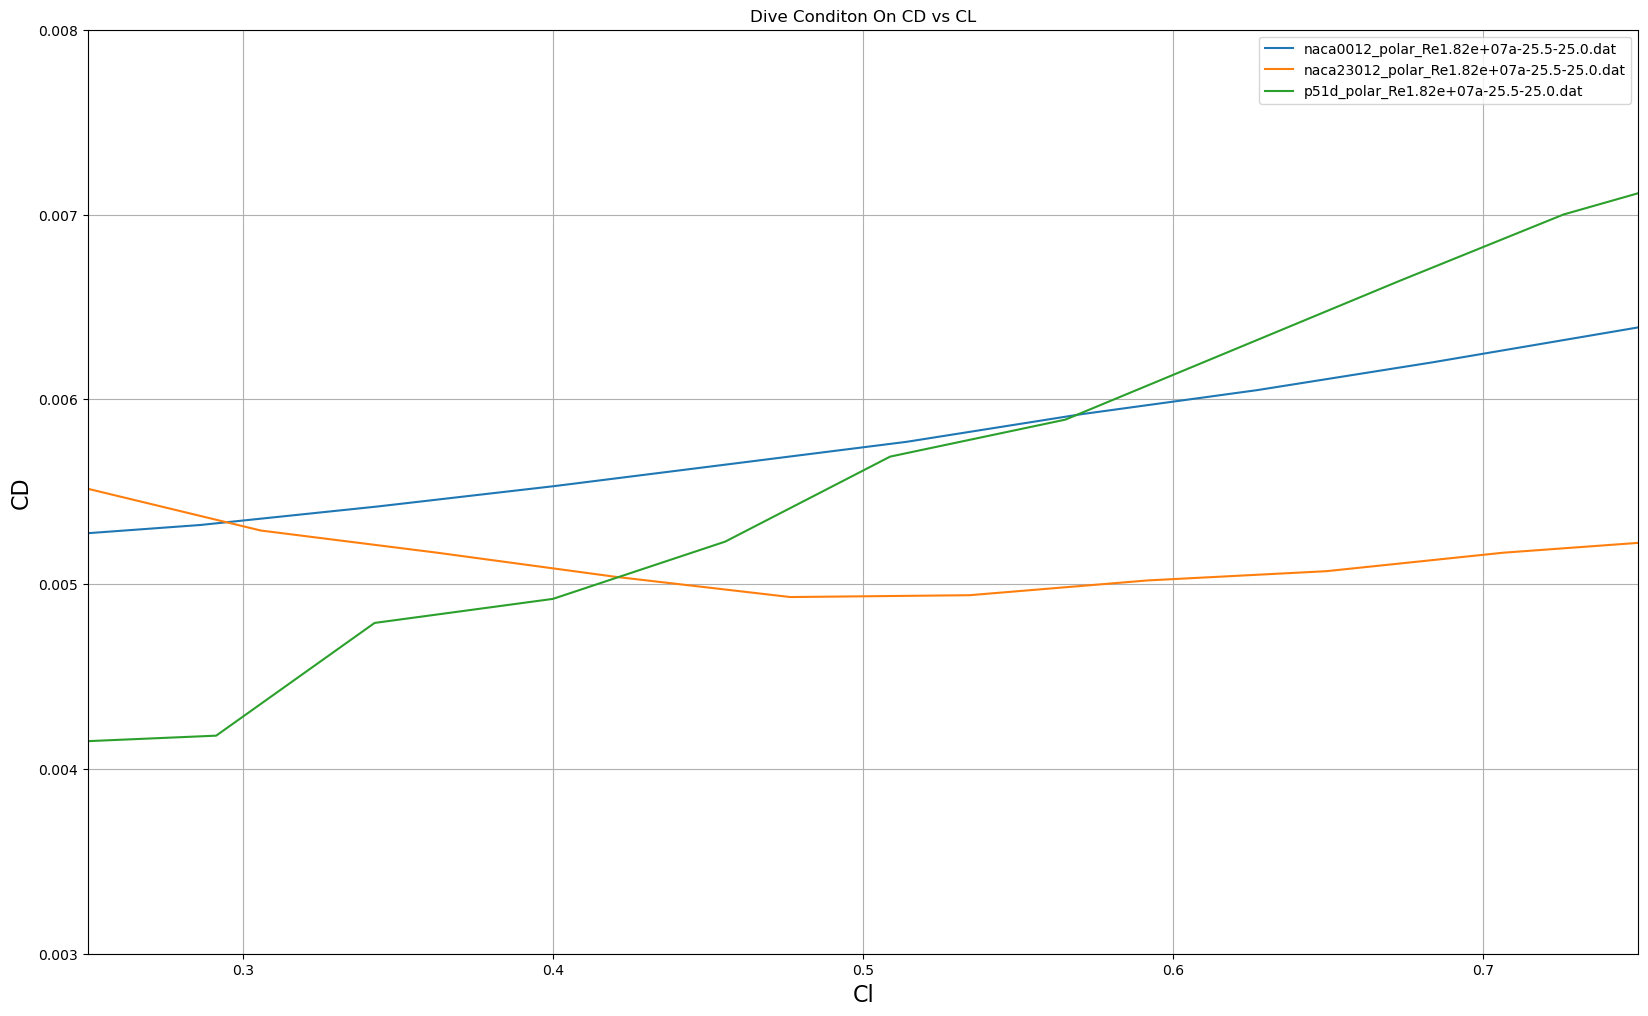

In [132]:
# Initialize the plot
plt.figure(figsize=(20, 12))
plt.grid(True)
plt.xlabel('Cl', fontsize=16)
plt.ylabel('CD', fontsize=16)
plt.ylim(0.003, .008)
plt.xlim(.25,.75)

# Loop through each file and plot the data
for filename in filenames:
    # Load data from file
    data = np.loadtxt(filename, dtype=float, unpack=True, skiprows=12)
    CL, CD = data[1], data[2]  # Assuming alpha is in column 0 and CL in column 1

    # Plot the data
    plt.plot(CL, CD, label=filename.split('/')[-1])  # Label with the file name

# Set up legend and show plot
plt.title('Dive Conditon On CD vs CL')
plt.legend()
plt.show()

# 2.2 Course 2 Performace Analysis


## Code
I performed the same methods used in section one but for this new course.

## Results 

We can see P51D is still the best option in this course as well.


In [133]:
given_alpha_values = [-12.5]  ## Personl pick

for filename in filenames:
    # Load the data
    data = np.loadtxt(filename, skiprows=12)
    alpha, CL, CD = data[:, 0], data[:, 1], data[:, 2]  # Assuming the first column is alpha and the second is CL
    
    # Create interpolation functions
    interp_CL = interp1d(alpha, CL, kind='linear', bounds_error=False)
    interp_CDive = interp1d(alpha, CD, kind='linear', bounds_error=False)

    # File header
    print(f"{'File:':<15} {filename.split('/')[-1]}\n")
    print(f"{'Condition':<15} {'Alpha':<10} {'Cl':<10} {'D':<10} {'L/D':<10}")

   # Interpolate and print values for each CL value
    for given_alpha in given_alpha_values:
        CL_interpolated, CDive_interpolated = interp_CL(given_alpha), interp_CDive(given_alpha)
        Dive = (1/2) * rho * (V_cruise**2) * CDive_interpolated * S
        L = 12000  # example value in Newtons for Lift Force
        L_Dive = L / Dive
        # Level Flight condition
        print(f"{'Dive':<15} {alpha_interpolated:<10.3f} {given_CL:<10.3f} {D:<10.3f} {L_Dive:<10.3f}")
    # Find the index of the maximum CL value
    max_index = np.argmax(CL)
    
    # Find the corresponding alpha value
    CLmax = CL[max_index]
    alphamax = alpha[max_index]
    CDmax = CD[max_index]
    Dmax = (1/2)*(rho)*((V_cruise)**2)*(CDmax)*S
    L = 12000  # example value in Newtons for Lift Force
    L_Dmax = L / Dmax
    
    print(f"{'Stall':<15} {alphamax:<10.3f} {CLmax:<10.3f} {Dmax:<10.3f} {L_Dmax:<10.3f}")

    print("\n")


File:           naca0012_polar_Re1.82e+07a-25.5-25.0.dat

Condition       Alpha      Cl         D          L/D       
Dive            2.919      0.500      269.479    24.784    
Stall           21.500     1.976      1710.264   7.016     


File:           naca23012_polar_Re1.82e+07a-25.5-25.0.dat

Condition       Alpha      Cl         D          L/D       
Dive            2.919      0.500      269.479    24.944    
Stall           20.000     1.981      1537.990   7.802     


File:           p51d_polar_Re1.82e+07a-25.5-25.0.dat

Condition       Alpha      Cl         D          L/D       
Dive            2.919      0.500      269.479    24.613    
Stall           21.000     1.704      3022.715   3.970     




# 3 Lattice Vortex Method

## Equations

No new equaations used

## Code
We used the methods as before to load data from out files and the plot the appropriate values on a graph I used a for loop to go throught 5 files and plot them rather then individually ploting the data.

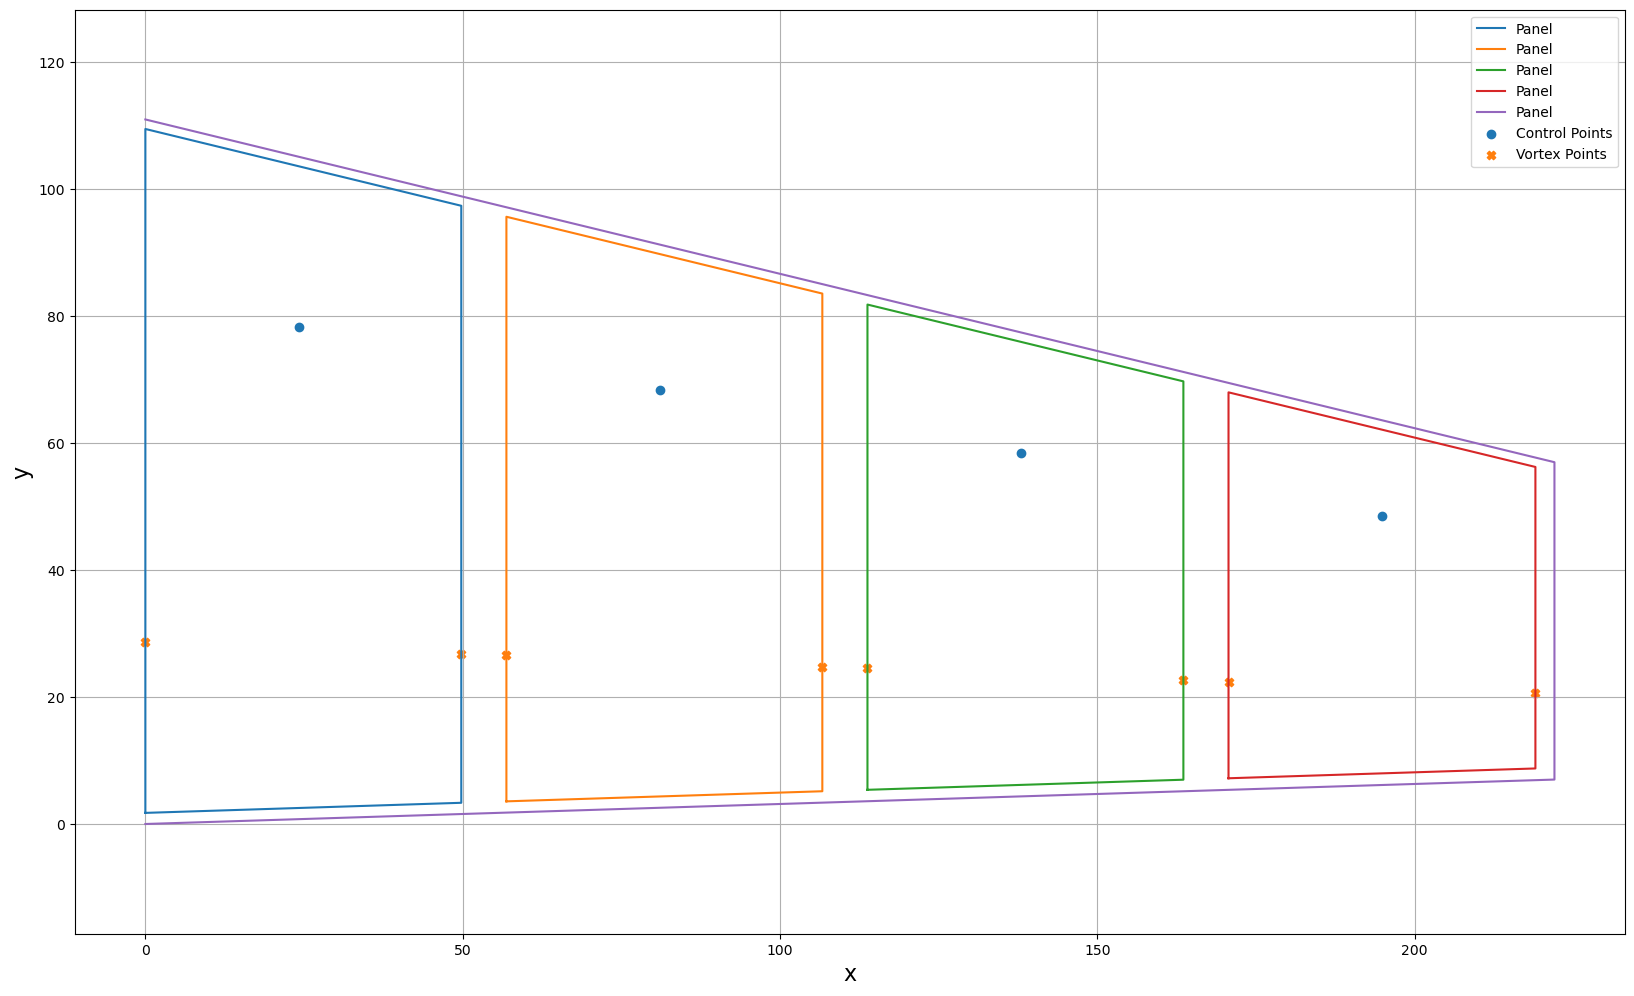

In [134]:
filenames = ['Data/PanelData/Panel_1_Coordinates.dat', 'Data/PanelData/Panel_2_Coordinates.dat', 'Data/PanelData/Panel_3_Coordinates.dat', 'Data/PanelData/Panel_4_Coordinates.dat', 'Data/PanelData/Planform_Coordinates.dat']

plt.figure(figsize=(20, 12))
plt.grid(True)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)

for filename in filenames:
    # Load the data
    data = np.loadtxt(filename, skiprows=2)
    x, y = data[:, 0], data[:, 1]
    plt.plot(x, y, label = 'Panel', linestyle = '-')

controlpoints = 'Data/PanelData/Control_Points.dat'
xC, yC  = np.loadtxt(controlpoints, dtype=float, unpack=True, skiprows=2)
plt.scatter(xC, yC, label = 'Control Points', marker = 'o')

vortex = 'Data/PanelData/Vortex_Points.dat'
Xv, Yv = x, z = np.loadtxt(vortex, dtype=float, unpack=True, skiprows=2)
plt.scatter(Xv, Yv, label = 'Vortex Points', marker= 'X')

plt.axis('equal')
plt.legend()
plt.show()

We repeat the step for the 3D case but we us the appropriate functions to transform our 2D plot into 3D

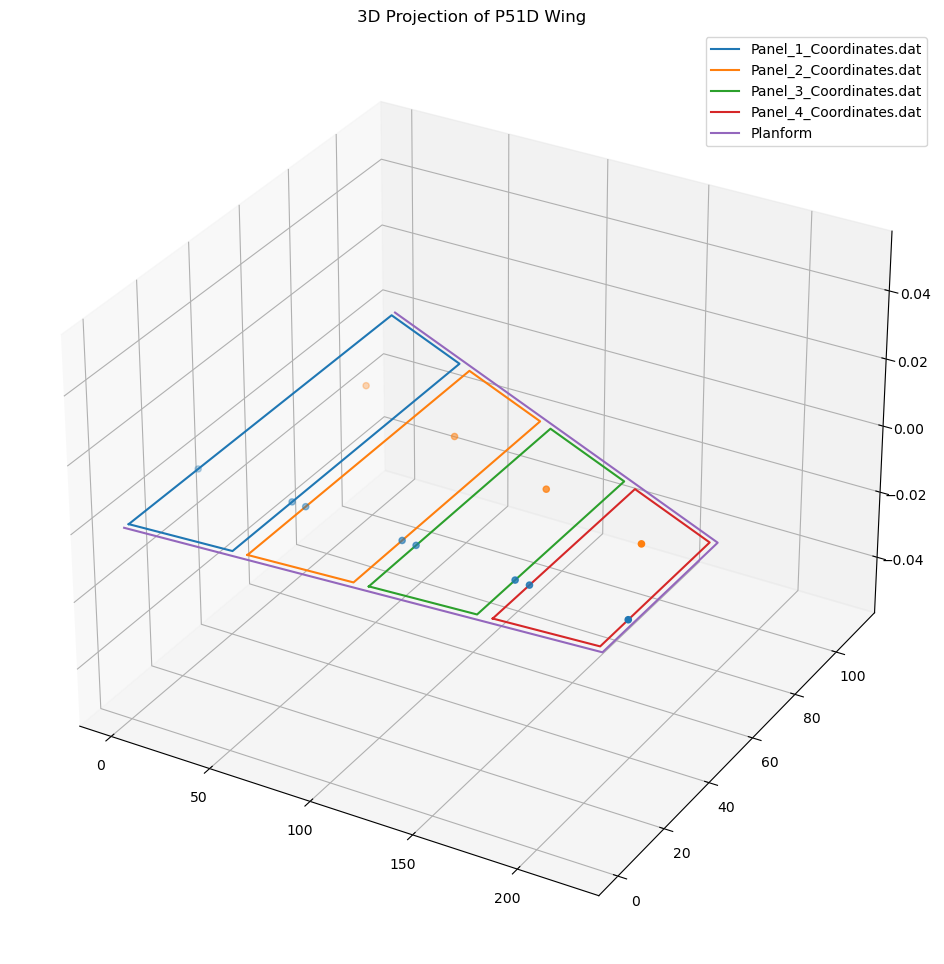

In [135]:
filenames = ['Data/PanelData/Panel_1_Coordinates.dat', 'Data/PanelData/Panel_2_Coordinates.dat', 'Data/PanelData/Panel_3_Coordinates.dat', 'Data/PanelData/Panel_4_Coordinates.dat']

# Create a single 3D subplot
fig = plt.figure(figsize=(30, 12))
ax = fig.add_subplot(111, projection='3d')

# Plot each panel's data
for filename in filenames:
    data = np.loadtxt(filename, skiprows=2)
    x, y = data[:, 0], data[:, 1]
    ax.plot(x, y, zs=0, zdir='z', label=filename.split('/')[-1])


# Load and plot the planform data
planform = 'Data/PanelData/Planform_Coordinates.dat'
wingplanx, wingplany = np.loadtxt(planform, dtype=float, unpack=True, skiprows=2)
ax.plot(wingplanx, wingplany, zs=0, zdir='z', label='Planform')
ax.scatter(Xv, Yv, 0) ##VOrtex Points
ax.scatter(xC, yC, 0) ## Control Points

# Show legend and plot title
ax.legend()
ax.set_title('3D Projection of P51D Wing')

# Display the plot
plt.show()


# Conclusion

In conclusion, this project delves into the design and analysis of aircraft for two distinct courses at the Reno Air Races. Through detailed examinations of three different airfoils, including NACA 0012, NACA 23012, and the laminar flow P-51D airfoil, the study explores their performance characteristics under specific flight conditions. The evaluation considers factors such as drag, lift, and the trade-off between the two, aiming to identify the most suitable airfoil for each course's unique requirements. Additionally, the project introduces the Simple Lattice Method setup for 2D and 3D analysis of the P-51D wing, providing a foundation for further investigations. Overall, this comprehensive analysis equips engineers with valuable insights into the aerodynamic considerations crucial for optimizing aircraft performance in competitive racing scenarios.